
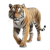
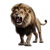
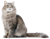
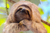
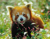
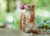
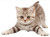
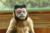
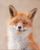
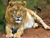

In [2]:
import os
from PIL import Image
import pandas as pd
import base64
from io import BytesIO
from IPython.display import HTML

# Функция для получения информации об изображениях
def to_dataframe(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                name = filename
                color_model = img.mode
                img_format = img.format
                channels = len(img.getbands())
                size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                
                # Создаем уменьшенную версию изображения
                thumbnail = img.copy()
                thumbnail.thumbnail((50, 50))
                
                # Преобразуем изображение в base64
                buffer = BytesIO()
                thumbnail.save(buffer, format="PNG")
                thumbnail_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
                
                # Добавляем данные в список
                data.append({
                    'name': name,
                    'color_model': color_model,
                    'format': img_format,
                    'channels': channels,
                    'size_mb': size_mb,
                    'width': width,
                    'height': height,
                    'full_path': file_path,
                    'thumbnail': f'<img src="data:image/png;base64,{thumbnail_base64}" style="max-height:50px;"/>'
                })
        except Exception:
            pass
    return pd.DataFrame(data)

# Путь к папке
folder_path = r'C:\Users\Денис1\Desktop\ХПИ\3\Python\lab4'

# Создаем DataFrame
df = to_dataframe(folder_path)

# Отображаем DataFrame
HTML(df.to_html(escape=False, formatters={'thumbnail': lambda x: x}))



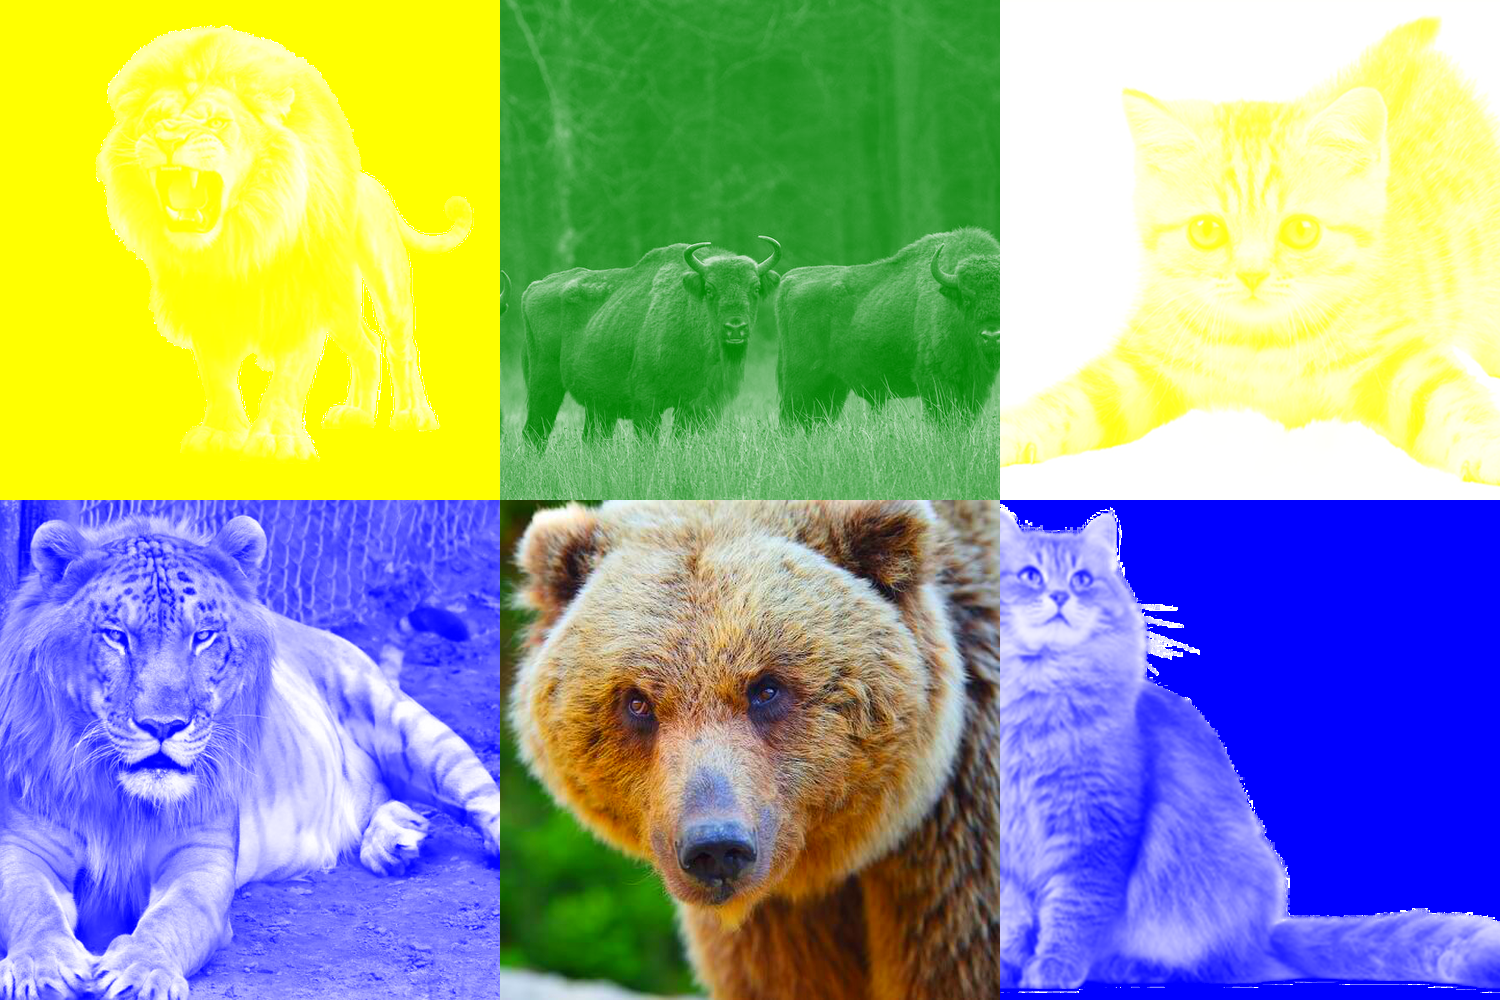

In [4]:
from PIL import Image, ImageOps, ImageEnhance
import random
import os
from IPython.display import display

def to_poster(folder_path, output_file, a, b):
    # Получаем список всех изображений в папке
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Если недостаточно изображений, используем повторы
    if len(image_files) < a * b:
        image_files = image_files * ((a * b) // len(image_files) + 1)
    
    # Выбираем случайные изображения
    selected_images = random.sample(image_files, a * b)
    
    # Размеры для каждой ячейки
    cell_size = (500, 500)
    
    # Применение фильтров
    def apply_random_filter(image):
        filters = [
            lambda img: ImageEnhance.Color(img).enhance(2),  # Усиление цвета
            lambda img: ImageEnhance.Brightness(img).enhance(1.5),  # Яркость
            lambda img: ImageOps.colorize(ImageOps.grayscale(img), black="red", white="white"),  # Красный
            lambda img: ImageOps.colorize(ImageOps.grayscale(img), black="green", white="white"),  # Зелёный
            lambda img: ImageOps.colorize(ImageOps.grayscale(img), black="blue", white="white"),  # Синий
            lambda img: ImageOps.colorize(ImageOps.grayscale(img), black="yellow", white="white"),  # Жёлтый
        ]
        return random.choice(filters)(image)
    
    # Создание пустого изображения для постера
    poster = Image.new('RGB', (cell_size[0] * a, cell_size[1] * b))
    
    # Добавляем изображения в постер
    for i, file_path in enumerate(selected_images):
        with Image.open(file_path) as img:
            # Обрезаем до квадрата, центрируем
            img = ImageOps.fit(img, cell_size, method=Image.Resampling.LANCZOS)
            img = apply_random_filter(img)  # Применяем случайный фильтр
            
            # Позиция в сетке
            x = (i % a) * cell_size[0]
            y = (i // a) * cell_size[1]
            poster.paste(img, (x, y))
    
    # Сохраняем постер
    poster.save(output_file)
    return poster

# Пример использования
folder_path = r'C:\Users\Денис1\Desktop\ХПИ\3\Python\lab4'

# Создание и отображение первого постера
poster1 = to_poster(folder_path, 'post3x2.png', 3, 2)
display(poster1)





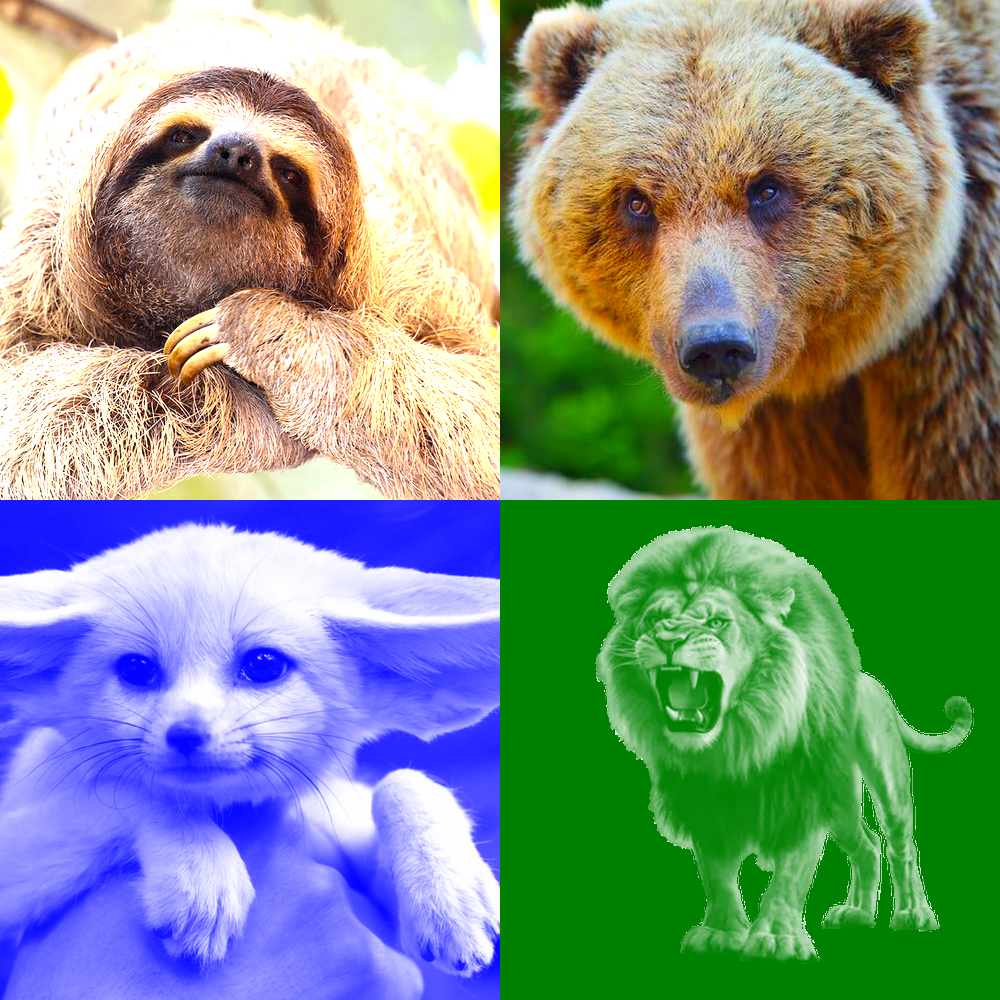

In [10]:
# Создание и отображение второго постера
poster2 = to_poster(folder_path, 'post2x2.png', 2, 2)
display(poster2)


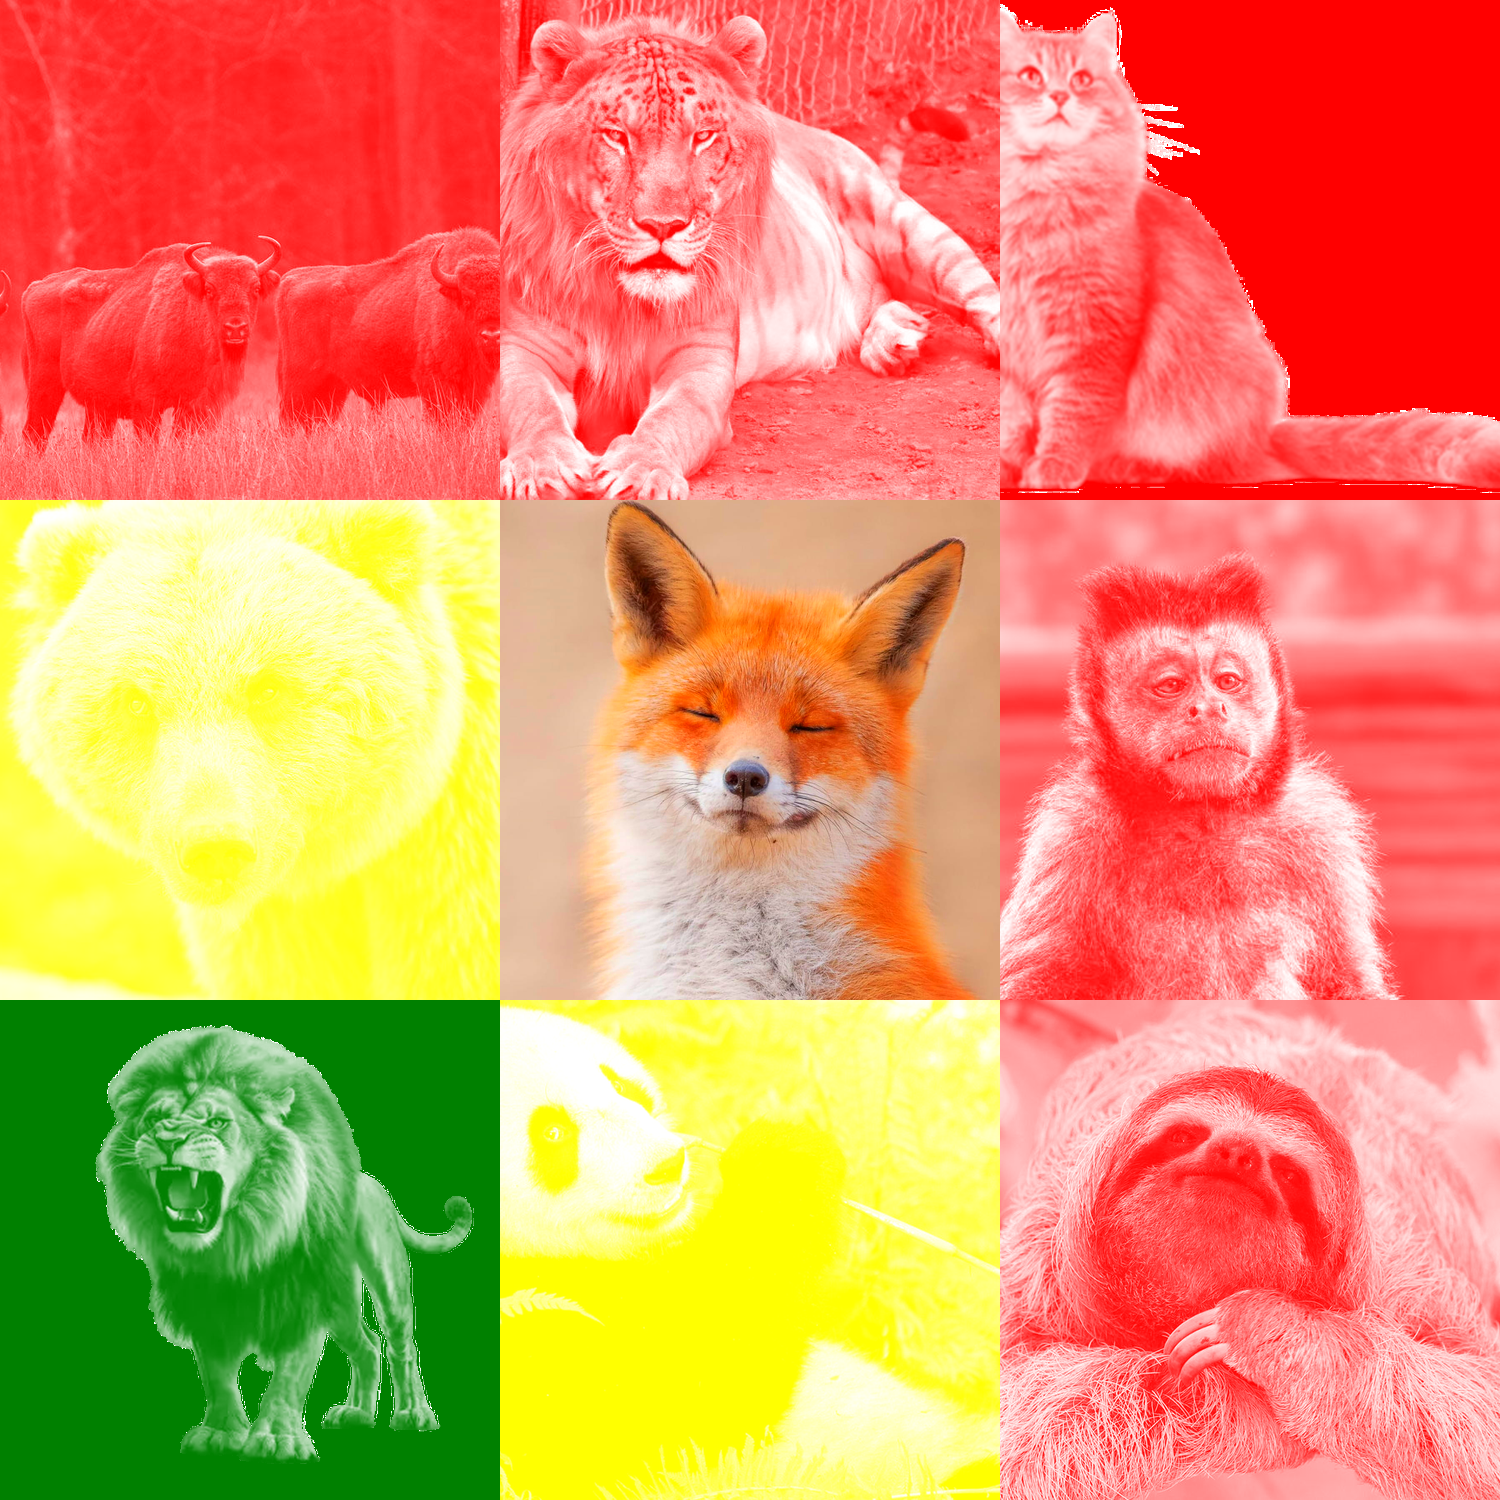

In [12]:
# Создание и отображение третьего постера
poster3 = to_poster(folder_path, 'post3x3.png', 3, 3)
display(poster3)